In [1]:
%matplotlib inline

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
im = Image.open('./assets/square.png').convert('LA')

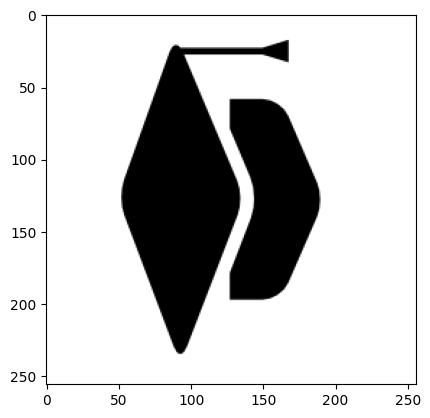

In [4]:
im_rotate = im.rotate(90)
im_rotate.save('./assets/square_90.png')
plt.imshow(im_rotate)

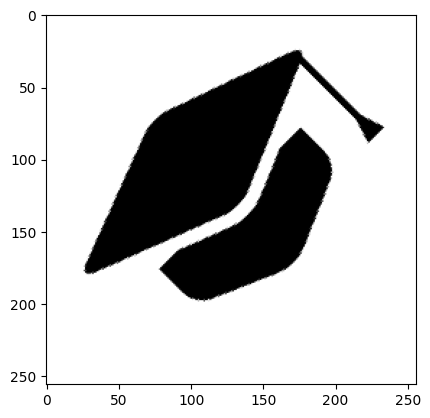

In [5]:
im_rotate = im.rotate(45)
im_rotate.save('./assets/square_45.png')
plt.imshow(im_rotate)

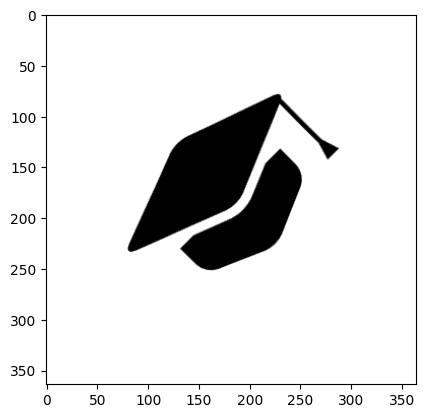

In [6]:
# фільтр Image.BICUBIC
im_rotate = im.rotate(45, expand=True, resample=Image.BICUBIC)
im_rotate.save('./assets/square_45_bic.png')
plt.imshow(im_rotate)

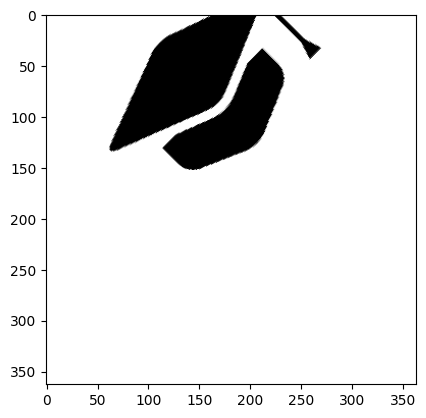

In [7]:
# зміна центру
im_rotate = im.rotate(45, expand=True, center=(0, 100))
im_rotate.save('./assets/square_45_center.png')
plt.imshow(im_rotate)

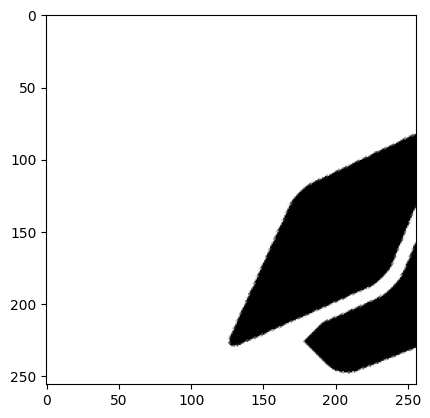

In [8]:
# поворот на 45 град зі зміщенням
im_rotate = im.rotate(45, translate=(100, 50))
im_rotate.save('./assets/square_45_rotate.png')
plt.imshow(im_rotate)

In [9]:
images = {
    'og_image': './assets/square.png',
    'im_rotate_90': './assets/square_90.png',
    'im_rotate_45': './assets/square_45.png',
    'im_rotate_45_bic': './assets/square_45_bic.png',
    'im_rotate_45_center': './assets/square_45_center.png',
    'im_rotate_45_dis': './assets/square_45_rotate.png',
}

huMomentsRsult = []

In [10]:
import cv2
import numpy as np


for image, image_file in images.items():
    im = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
    
    moments = cv2.moments(im) 
    huMoments = cv2.HuMoments(moments)

    huMoments = np.random.rand(7)
    for i in range(7):
        huMoments[i] = -1 * np.sign(huMoments[i]) * np.log10(np.abs(huMoments[i]))

    huMomentsRsult.append([huMoments])

huMomentsRsult

[[array([0.02172741, 0.34009952, 0.19149926, 0.24901702, 0.06048582,
         0.3902156 , 0.04017268])],
 [array([0.13412538, 0.41294714, 0.33838881, 1.03597735, 0.08139675,
         0.34706237, 0.54689324])],
 [array([1.59426224, 0.51711319, 0.01721863, 0.4585274 , 0.4138736 ,
         1.14251821, 0.52429849])],
 [array([0.39489348, 0.22495243, 1.11233757, 0.25453826, 1.44334531,
         0.40881763, 0.05946345])],
 [array([0.81433923, 0.11609991, 0.0661114 , 0.27264321, 0.28342505,
         0.67787701, 0.24413794])],
 [array([1.64662923, 0.37844953, 0.09162217, 0.38754843, 0.05388009,
         0.31276694, 0.8684819 ])]]